In [2]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [3]:
date = "JUN07"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

(abs(goodPhotons_eta) > 1.4)
!(abs(goodPhotons_eta) > 1.4)


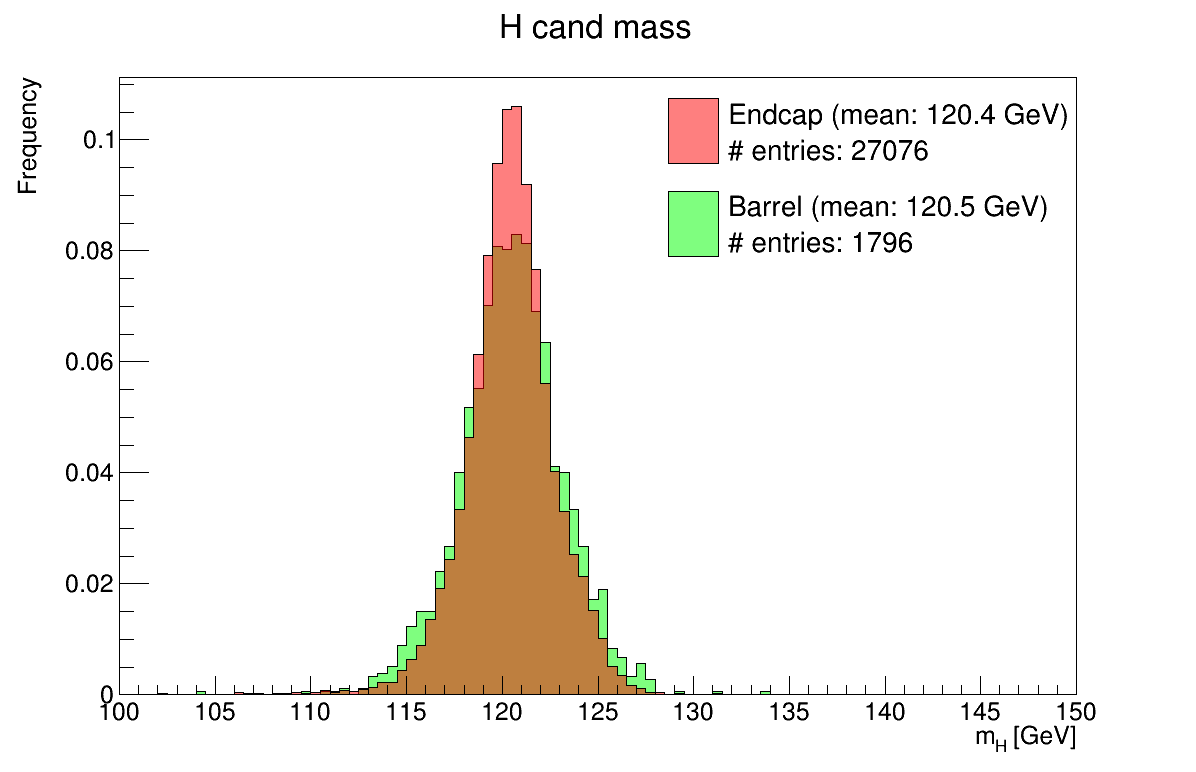

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

bins, xlow, xhigh = 100*1, 100, 150

filt2 = "(abs(goodMeson_eta) > 1.4)"
filt1 = "(abs(goodPhotons_eta) > 1.4)"
nofilt = "!" + filt1

print(filt1)
print(nofilt)

#Kinematic Mass
hgood=df.Define("scale", "w*lumiIntegrated")\
    .Define("filter1", filt1)\
    .Define("filter2", filt2)\
    .Filter("Sum(filter1)>0 && Sum(filter2)>0")\
    .Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")
hbad=df.Define("scale", "w*lumiIntegrated")\
    .Define("filter", nofilt)\
    .Filter("Sum(filter)>0")\
    .Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")

hbad.SetFillColorAlpha(ROOT.kRed, 0.5)
hbad.SetLineColor(ROOT.kBlack)
hgood.SetFillColorAlpha(ROOT.kGreen, 0.5)
hgood.SetLineColor(ROOT.kBlack)

hbad.Scale(1/hbad.GetEntries())
hgood.Scale(1/hgood.GetEntries())


stack = ROOT.THStack("stack", "H cand mass")
stack.Add(hgood.GetValue())
stack.Add(hbad.GetValue())
stack.Draw("hist nostack")
stack.GetXaxis().SetTitle("m_{H} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.55, 0.65, 0.9, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hbad.GetValue(), "#splitline{{Endcap (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hbad.GetMean(), 1), round(hbad.GetEntries(), 0)), "f")
legend.AddEntry(hgood.GetValue(), "#splitline{{Barrel (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hgood.GetMean(), 1), round(hgood.GetEntries(), 0)), "f")
legend.Draw()

canvas.Draw()


In [5]:
dfext = df.Define("D0GenPT", "getPTParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 421, 423, 25)[0]")\
    .Define("D0GenPhi", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[0]")\
    .Define("D0GenEta", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[1]")\
    .Define("PhotonGenPT", "getPTParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 22, 25)[0]")\
    .Define("PhotonGenPhi", "getPhiEtaParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 22, 25)[0]")\
    .Define("PhotonGenEta", "getPhiEtaParticleMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 22, 25)[1]")\
    .Define("size", "goodMeson_pt.size()")\
    .Define("sizePhoton", "goodPhotons_pt.size()")

In [6]:
dfnew = dfext.Filter("sizePhoton  > 1")

cols = ["D0GenPT", "D0GenPhi", "D0GenEta", "goodMeson_pt", "goodMeson_phi", "goodMeson_eta", "goodMeson_vtx_prob"]
cols = ["PhotonGenPT", "PhotonGenEta", "goodPhotons_pt", "goodPhotons_eta"]

x = dfnew.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

display(pddf)

,PhotonGenPT,PhotonGenEta,goodPhotons_pt,goodPhotons_eta
0,69.750,0.589844,"[71.65534973144531, 65.22669219970703]","[0.5904541015625, 1.16357421875]"
1,53.375,-0.636719,"[89.93465423583984, 52.553611755371094]","[1.01416015625, -0.6390380859375]"
2,52.500,-0.673828,"[53.13038635253906, 41.69599914550781]","[-0.6734619140625, 0.7022705078125]"
3,65.750,-0.984375,"[65.65457916259766, 49.02846908569336]","[-0.983154296875, 0.40045166015625]"
4,44.375,-0.400391,"[43.91511917114258, 43.499507904052734]","[-0.401123046875, -1.098876953125]"
5,41.875,0.000616,"[42.407894134521484, 38.0616455078125]","[-0.0010743141174316406, -0.9825439453125]"
6,180.500,-0.656250,"[181.99774169921875, 71.25615692138672]","[-0.6556396484375, -0.38995361328125]"
7,349.000,-0.972656,"[343.8994140625, 219.9168701171875]","[-0.971435546875, 1.26171875]"


In [7]:
extraTitle = "barrel meson, barrel photon"
filters = ["abs(goodMeson_eta) < 1.4", "abs(goodPhotons_eta) < 1.4"]

for i in range(len(filters)):
    filterName = "filter_" + str(i)
    print(filterName)
    print(filters[i])
    print("Sum({})>0".format(filterName))


filter_0
abs(goodMeson_eta) < 1.4
Sum(filter_0)>0
filter_1
abs(goodPhotons_eta) < 1.4
Sum(filter_1)>0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


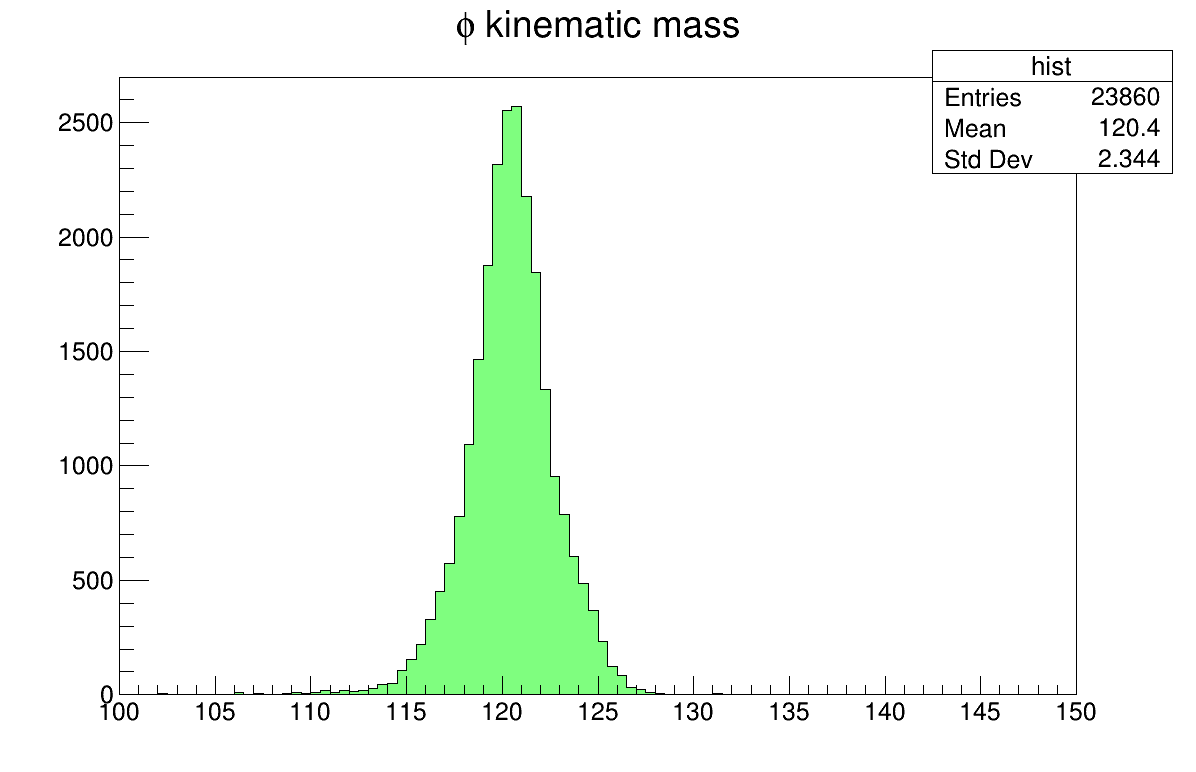

In [8]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

bins, xlow, xhigh = 100*1, 100, 150

df = ROOT.RDataFrame(chainSGN)

for i in range(len(filters)):
    filterName = "filter_" + str(i)
    df = df.Define(filterName, filters[i]).Filter("Sum({})>0".format(filterName))


hgood=df.Define("scale", "w*lumiIntegrated").Histo1D(("hist", "#phi kinematic mass", bins, xlow, xhigh),"HCandMass")
hgood.SetFillColorAlpha(ROOT.kGreen, 0.5)
hgood.SetLineColor(ROOT.kBlack)
hgood.Draw("hist")

canvas.Draw()

In [9]:
print(type(hgood))
print(type(hgood.GetValue()))
h = ROOT.TH1D(hgood.GetValue())
print(type(h))

<class cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> at 0x55f8ac27a090>
<class cppyy.gbl.TH1D at 0x55f8af3a07f0>
<class cppyy.gbl.TH1D at 0x55f8af3a07f0>


In [19]:
def getHistoFromFile(fileName):
    with ROOT.TFile(fileName, "read") as infile:
        h = infile.Get("myhisto")
        #Hist is associated with file and becomes None when file is destroyed. This line is to disassociate
        h.SetDirectory(0)
        return h


def saveHistoToFile(h, fileName):
    with ROOT.TFile(fileName, "recreate") as outfile:
        outfile.WriteObject(h, "myhisto")

In [33]:
cat = "GFcat"
mesonCat = "D0StarCat"
year = 2018
date = "JUN07"
extraTitle = "barrel meson, barrel photon"
#extraTitle = None
filters = ["abs(goodMeson_eta) < 1.4", "abs(goodPhotons_eta) < 1.4"]
fileName = "HCandMassHist_" + mesonCat[:-3] + "_" + cat[:-3] + "_" + str(year) + "_" + date + ".root"
if extraTitle is not None:
    fileName = fileName[:-5] + "__" + extraTitle.replace(" ", "_").replace(",", "") + fileName[-5:]

print(fileName)

HCandMassHist_D0Star_GF_2018_JUN07__barrel_meson_barrel_photon.root


In [36]:
mesonCat = "D0StarCat"

fileName = "~/public_html/fits/{}/{}_fit.png".format(mesonCat[:-3], mesonCat)

print(fileName)

~/public_html/fits/D0Star/D0StarCat_fit.png
